Reach me at jacktuckerbrown@gmail.com

# Preamble + extracting and organizing data (Remove all Google code once reading csv)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

import gspread
from IPython.display import display
import time
import matplotlib.pyplot as plt
import playsound
import csv
from datetime import datetime
from datetime import timedelta
from datetime import date
import random

# Worked example for using Python with Google Sheets available at

gc = gspread.service_account(filename=r'C:\Users\jackt\OneDrive - Newcastle University\Project - summer\Git repository\client_secret.json')

import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import dataframe_image as dfi 
from oauth2client.service_account import ServiceAccountCredentials

# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)

names = ['Survey 1 (Responses)', # List of strings, the names of the excel files containing the responses to each survey.
'Survey 2 (Responses)',
'Survey 3 (Responses)',
'Survey 4 (Responses)',
'Survey 5 (Responses)',
'Survey 6 (Responses)']

import matplotlib
import matplotlib.ticker as ticker
plt.style.use('default')

matplotlib.rcParams.update({'font.size': 18})

#print("Opening master spreadsheet")    
sh  = gc.open('Survey builder')
worksheet = sh.sheet1

questions = worksheet.col_values(6)
questions.pop(0)
correct_answers = worksheet.col_values(2)
correct_answers.pop(0)
snr = worksheet.col_values(20)
snr.pop(0)
survey_n = worksheet.col_values(19)
survey_n.pop(0)

df_master = pd.DataFrame({'Questions from master' : [],
                          'Correct value' : [],
                          'SNR' : []})

for i in range(0,54):
    df_master = df_master.append({'Questions from master':questions[i],
                                  'Correct value':correct_answers[i],
                                  'SNR':snr[i]},
                                  ignore_index=True)

#display(df_master)

df_sound = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         '# of 0s': [],
                         '# of 1s': [],
                         '# of 2s': [],
                         '# of 3s': [],
                         '# of 4s': [],
                         'KS test result': [],
                         'σ': [],
                         'SNR': [],
                         'Survey': []})
#display(df_sound)

df_visual = pd.DataFrame({'Name': [],
                          'Correct n': [],
                          'Number of correct answers': [],
                          'Total responses': [],
                          '# of 0s': [],
                          '# of 1s': [],
                          '# of 2s': [],
                          '# of 3s': [],
                          '# of 4s': [],
                          'KS test result': [],
                          'σ': [],
                          'SNR': [],
                          'Survey': []})
#display(df_visual)

df_video = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         '# of 0s': [],
                         '# of 1s': [],
                         '# of 2s': [],
                         '# of 3s': [],
                         '# of 4s': [],
                         'KS test result': [],
                         'σ': [],
                         'SNR': [],
                         'Survey': []})
#display(df_video)

substringsoni = "sonification"
substringvid = "video"
substringplot = "plot"

substrings_array = [substringsoni,substringvid,substringplot]

def sorting_hat(i, substring): ## Call this over range of i, over each substring to sort all the data
    
    query = df_master['Questions from master'] 
    
    if substring in query[i]: 
        
        #print("I found", substring, "at entry", i,"in database")
        
        if substring == "sonification":
            
            global df_sound
            
            df_sound = df_sound.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        '# of 0s': '',
                                        '# of 1s': '',
                                        '# of 2s': '',
                                        '# of 3s': '',
                                        '# of 4s': '',
                                        'σ': '',
                                        'SNR':snr[i],
                                        'Survey':survey_n[i]},ignore_index=True)
            
        elif substring == "plot":
            
            global df_visual
            
            df_visual = df_visual.append({'Name':query[i],
                                          'Correct n':correct_answers[i],
                                          'Number of correct answers': '',
                                          'Total responses': '',
                                          '# of 0s': '',
                                          '# of 1s': '',
                                          '# of 2s': '',
                                          '# of 3s': '',
                                          '# of 4s': '',
                                          'σ': '',
                                          'SNR':snr[i],
                                          'Survey':survey_n[i]},ignore_index=True)
            
        else:
        
            global df_video
            
            df_video = df_video.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        '# of 0s': '',
                                        '# of 1s': '',
                                        '# of 2s': '',
                                        '# of 3s': '',
                                        '# of 4s': '',
                                        'σ': '',
                                        'SNR':snr[i],
                                        'Survey':survey_n[i]},ignore_index=True)

for i in range(0,len(df_master['Questions from master'])):
    
    for x in substrings_array:    
        
        sorting_hat(i,x)
    
#display(df_sound,df_visual,df_video)

#print("Sanity check",len(df_sound['Name']),len(df_visual['Name']),len(df_video['Name'])) 

# Demographics (make figure the same colour as success rates?)

203 responses
Number of respondents per survey [40, 35, 29, 39, 29, 31]
11 users identified as blind or visually impaired





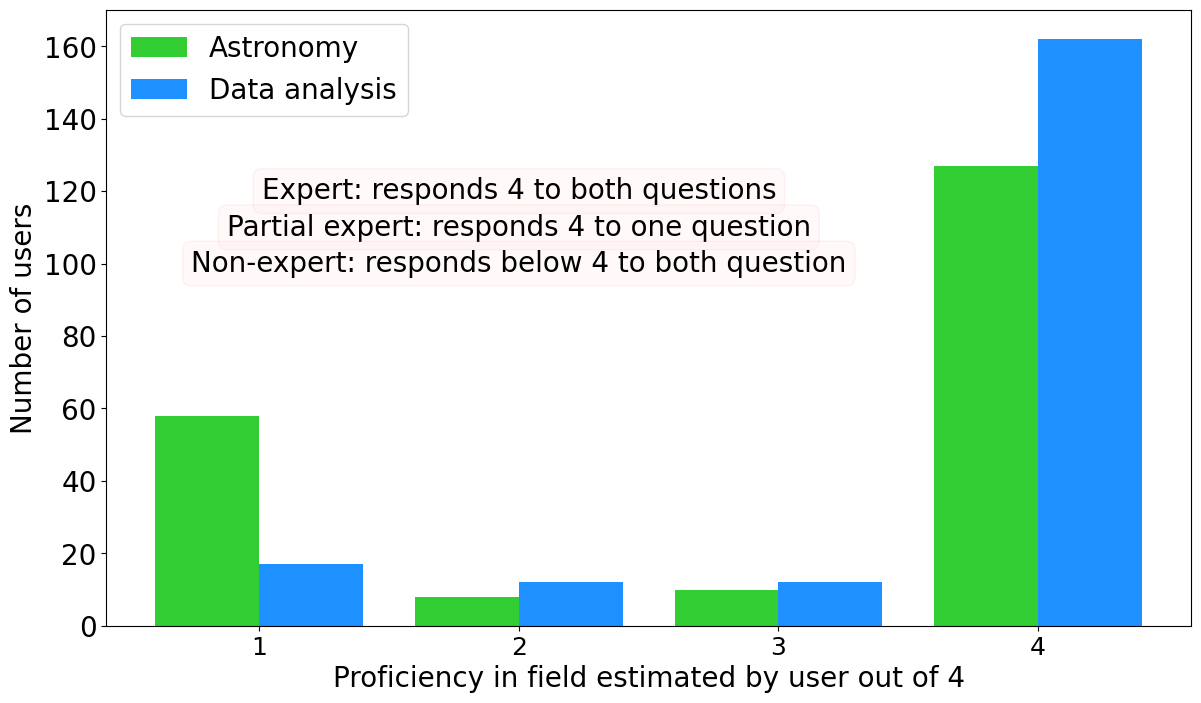

In [2]:
n_users = []

weighting_matrix = pd.DataFrame({'Astronomy proficiency/4' : [],
                                 'Data analysis proficiency/4' : [],
                                 'Music proficiency/4' : [],
                                 'Visual impairment Y/N' : []})

total = len(weighting_matrix)

def weighting_function(survey_sheet):

    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    astro = worksheet.col_values(2)
    astro.pop(0)

    data = worksheet.col_values(3)
    data.pop(0)
    
    music = worksheet.col_values(4)
    music.pop(0)
    
    yn = worksheet.col_values(5)
    yn.pop(0)
    
    n_users.append(len(astro))
    
    for i in range(0,len(astro)):
        
        global weighting_matrix
            
        weighting_matrix = weighting_matrix.append({'Astronomy proficiency/4' : astro[i],
                                             'Data analysis proficiency/4' : data[i],
                                             'Music proficiency/4' : music[i],
                                             'Visual impairment Y/N' : yn[i]},
                                             ignore_index=True)
                
for x in names:

    weighting_function(x)

#display(weighting_matrix)
print(len(weighting_matrix['Astronomy proficiency/4']),
      "responses")
print("Number of respondents per survey",n_users)
#print("Sanity check...", sum(n_users))

#del dict

impair = weighting_matrix['Visual impairment Y/N'].value_counts(sort=True, ascending=True)
print(impair[0],"users identified as blind or visually impaired")
print()
#----------------------------------------------------------------------------------------------------
astroprof = weighting_matrix['Astronomy proficiency/4'].value_counts(normalize=False)
#print(astroprof)
print()
astroprof_x = np.linspace(1,4,4)
astroprof_y = [astroprof[1],astroprof[3],astroprof[2],astroprof[0]]

#----------------------------------------------------------------------------------------------------
dataprof = weighting_matrix['Data analysis proficiency/4'].value_counts(normalize=False)
#print(dataprof)
print()
dataprof_x = np.linspace(1,4,4)
dataprof_y = [dataprof[1],dataprof[2],dataprof[3],dataprof[0]]

#----------------------------------------------------------------------------------------------------
musicprof = weighting_matrix['Music proficiency/4'].value_counts(normalize=False)
#print(musicprof)
musicprof_x = np.linspace(1,4,4)
musicprof_y = [musicprof[0],musicprof[1],musicprof[2],musicprof[3]]

matplotlib.rcParams.update({'font.size': 20})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar(astroprof_x-0.2, astroprof_y, width=0.4, color='limegreen', align='center',label='Astronomy')
ax.bar(dataprof_x+0.2, dataprof_y, width=0.4, color='dodgerblue', align='center',label='Data analysis')
ax.set_xlabel("Proficiency in field estimated by user out of 4")
ax.set_ylabel("Number of users")
ax.legend(loc='best')

matplotlib.rcParams.update({'font.size': 14})
plt.text(2, 120, "Expert: responds 4 to both questions", color='black', size=20,
         ha="center", va="center",
         bbox=dict(facecolor='none', edgecolor='green',
                   boxstyle="round", alpha=0.1,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.text(2, 110, "Partial expert: responds 4 to one question", color='black', size=20,
         ha="center", va="center",
         bbox=dict(facecolor='white', edgecolor='green',
                   boxstyle="round", alpha=0.1,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.text(2, 100, "Non-expert: responds below 4 to both question", color='black', size=20,
         ha="center", va="center",
         bbox=dict(facecolor='white', edgecolor='green',
                   boxstyle="round", alpha=0.1,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.xticks([1,2,3,4],fontsize=18)
#plt.gcf()
plt.savefig("New report/Produced figures/2Combined bar chart of demographics.jpg")

d = {'Estimated proficiency': [1,2,3,4], 'Astronomy': astroprof_y, 'Data analysis': dataprof_y}
df = pd.DataFrame(data=d)
f = open("demographics.tex", "w")
f.write(df.to_latex(index=False))
f.close()

bvi = [] # This is a list of indices of BVI users, which we're going to remove as the numbers are too small.
for i in range(0,len(weighting_matrix)):
    if weighting_matrix.loc[i,'Visual impairment Y/N'] == 'Yes':
        bvi.append(i)
    
responses = pd.DataFrame({'Astro expert Y': [],
                          'Data expert Y': [],
                          'Music proficiency/4': []})

astro = []
data = []
music = []

def convertyn():

    global responses
    global astro
    global data
    global music
    
    astro_resp = weighting_matrix["Astronomy proficiency/4"].tolist()

    astro_respint = []
    astro = []
    
    for sublist in astro_resp:
        for item in sublist:
            if item == '':
                astro_respint.append(0)#astro_resp.remove(sublist)
            else:
                astro_respint.append(int(item))
    for i in astro_respint:
        if i == 4:
            astro.append('Y')
        else:
            astro.append('N')

    data_resp = weighting_matrix["Data analysis proficiency/4"].tolist()

    data_respint = []
    data = []
    
    for sublist in data_resp:
        for item in sublist:
            if item == '':
                data_resp.remove(sublist)
            else:
                data_respint.append(int(item))
    for i in data_respint:
        if i == 4:
            data.append('Y')
        else:
            data.append('N')

    music_resp = weighting_matrix["Music proficiency/4"].tolist()

    music_respint = []
    music = []
    
    for sublist in music_resp:
        for item in sublist:
            if item == '':
                music_respint.append(0)
            else:
                music_respint.append(int(item))
    music = music_respint
            
    #print(len(music),len(astro),len(data))
            
    for i in range(0,len(astro)):
        
        if astro[i] == 'Y':
            responses.loc[i, 'Astro expert Y'] = True
        
        else:
            responses.loc[i, 'Astro expert Y'] = False
            
        if data[i] == 'Y':
            responses.loc[i, 'Data expert Y'] = True
            
        else:
            responses.loc[i, 'Data expert Y'] = False
            
        responses.at[i,'Music proficiency/4'] = music[i] # Dropping any responses that weren't given as a number 1-4 

convertyn()
#display(responses)

values = responses.value_counts(sort=False).to_frame()
dfi.export(values,'New report/Produced figures/values.png')

responses_drop = responses.drop(columns=['Music proficiency/4'])
values_drop = responses_drop.value_counts(sort=True).to_frame()
dfi.export(values_drop,'New report/Produced figures/values_drop.png')

#display(values_drop) 

# Set up

In [24]:
global responses
global weighting_matrix

expert = responses # Create three duplicates of the matrix of responses - for experts, partial experts, amateurs.
nexpert = responses
pexpert = responses

expert = expert[expert['Astro expert Y'] != False]
expert = expert[expert['Data expert Y'] != False]

expert_indices = expert.index
#print(expert_indices)

pexpert = pexpert.drop(pexpert.index[expert_indices]) # This is actually partial experts + non-experts collated
#display(pexpert)

nexpert = nexpert[nexpert['Astro expert Y'] != True] # Just responses for not experts in either category (smaller dataset)
nexpert = nexpert[nexpert['Data expert Y'] != True]


partials = []
for i in range(0,len(pexpert)):
    if pexpert.index[i] not in nexpert.index:
        partials.append(pexpert.index[i])
        
#print(partials,len(partials))

#display(expert,nexpert)
print("Number of expert responses",len(expert), ": Number of partial experts responses",len(pexpert), ": Number of non-experts responses",len(nexpert))

expert_sound = df_sound.copy(deep=True)
expert_visual = df_visual.copy(deep=True)
expert_video = df_video.copy(deep=True)

nexpert_sound = df_sound.copy(deep=True)
nexpert_visual = df_visual.copy(deep=True)
nexpert_video = df_video.copy(deep=True)

pexpert_sound = df_sound.copy(deep=True)
pexpert_visual = df_visual.copy(deep=True)
pexpert_video = df_video.copy(deep=True)

def sorting_hat_success(sound,visual,video,query,success,responses,err,n0,n1,n2,n3,n4):

    if "sonification" in query: # question contains substring
        
        col = sound['Name']
    
        for i in range(0,len(col)):
            
            cell = sound.iloc[i]['Name']
            
            if query in cell:
                
                sound.at[i,'Number of correct answers'] = sound.at[i,'Number of correct answers'].replace('',str(success))
                sound.at[i,'Total responses'] = sound.at[i,'Total responses'].replace('',str(responses))
                sound.at[i,'# of 0s'] = sound.at[i,'# of 0s'].replace('',str(n0))
                sound.at[i,'# of 1s'] = sound.at[i,'# of 1s'].replace('',str(n1))
                sound.at[i,'# of 2s'] = sound.at[i,'# of 2s'].replace('',str(n2))
                sound.at[i,'# of 3s'] = sound.at[i,'# of 3s'].replace('',str(n3))
                sound.at[i,'# of 4s'] = sound.at[i,'# of 4s'].replace('',str(n4))
                sound.at[i,'σ'] = sound.at[i,'σ'].replace('',str(err))
                
    elif "plot" in query:

        col = visual['Name']
    
        for i in range(0,len(col)):
            
            cell = visual.iloc[i]['Name']
            
            if query in cell:
                
                visual.at[i,'Number of correct answers'] = visual.at[i,'Number of correct answers'].replace('',str(success))
                visual.at[i,'Total responses'] = visual.at[i,'Total responses'].replace('',str(responses))
                visual.at[i,'# of 0s'] = visual.at[i,'# of 0s'].replace('',str(n0))
                visual.at[i,'# of 1s'] = visual.at[i,'# of 1s'].replace('',str(n1))
                visual.at[i,'# of 2s'] = visual.at[i,'# of 2s'].replace('',str(n2))
                visual.at[i,'# of 3s'] = visual.at[i,'# of 3s'].replace('',str(n3))
                visual.at[i,'# of 4s'] = visual.at[i,'# of 4s'].replace('',str(n4))
                visual.at[i,'σ'] = visual.at[i,'σ'].replace('',str(err))
                
    else:

        col = video['Name']
    
        for i in range(0,len(col)):
            
            cell = video.iloc[i]['Name']
            
            if query in cell:
                
                video.at[i,'Number of correct answers'] = video.at[i,'Number of correct answers'].replace('',str(success))
                video.at[i,'Total responses'] = video.at[i,'Total responses'].replace('',str(responses))
                video.at[i,'# of 0s'] = video.at[i,'# of 0s'].replace('',str(n0))
                video.at[i,'# of 1s'] = video.at[i,'# of 1s'].replace('',str(n1))
                video.at[i,'# of 2s'] = video.at[i,'# of 2s'].replace('',str(n2))
                video.at[i,'# of 3s'] = video.at[i,'# of 3s'].replace('',str(n3))
                video.at[i,'# of 4s'] = video.at[i,'# of 4s'].replace('',str(n4))
                video.at[i,'σ'] = video.at[i,'σ'].replace('',str(err))
                
def search_function(survey_sheet,output_sound,output_visual,output_video):
    
    sh = gc.open(survey_sheet)
    worksheet = sh.sheet1

    print(survey_sheet,"opened.")
    print("")

    global total_responses_counter
    global to_remove

    success_rates = []
    snr = []

    for i in range(6,15): # iterating over each question in the survey
        
        questioncol = worksheet.col_values(i) # Obtaining the question string for each form.
        #print(questioncol)
        question = questioncol[0]
        responses = questioncol[1:] # Getting the responses given to the question. Take away indices we want to remove from lists in cells above.
        n_users = len(responses)
        #print(n_users)
        
        outs = to_remove_sort()
        responses = condition(survey_sheet,responses,outs)
        
        for j in range(0,len(df_master['Questions from master'])): # Matching up sorted data using sortinghat and appending to databases.

            if df_master.iloc[j]['Questions from master'] == question:
                #print("I found",question,"in the master")
                #print("It's value of snr is",df_master.iloc[j]['snr'])
                #print("The correct answer was",df_master.iloc[j]['correct value'],"transit")
                #print("The responses were",responses)
                
               #np.std(np.array(filter_float(responses)).astype(np.float))#
                
                ks = np.array(filter_float(responses)).astype(np.float)
                #flat = scipy.stats.kstest(ks,'randint',args=(0,4))
                
                bool_list = []

                ## Search across the three databases for the relevant string, then once found
                ## search for the relevant snr. 

                for k in responses: ## Success rate calculation here
                
                        test = list(map(lambda x, y: x == y, df_master.iloc[j]['Correct value'], k))
                        bool_list = bool_list + test

                #print(bool_list)

                true_count = sum(bool_list)
                sigma = np.sqrt(true_count)/len(responses)
                #print("got a true count of ",true_count)
                #print("got",len(responses),"responses")
                #perc = true_count/len(bool_list)*100.0

                sorting_hat_success(output_sound,output_visual,output_video,
                                    question,true_count,
                                    len(responses),sigma,
                                    #flat[0],flat[1],
                                    responses.count('0'),responses.count('1'),
                                    responses.count('2'),responses.count('3'),
                                    responses.count('4'))

            else:
                continue
                
def to_remove_sort():

    #to_remove = []

    n1remove = [] 
    n2remove = []
    n3remove = []
    n4remove = []
    n5remove = []
    n6remove = []
    
    for x in to_remove:
        if -1 < x <= n_users[0]-1:
            n1remove.append(x)

        elif n_users[0] <= x <= n_users[1]+n_users[0]-1:
            n2remove.append(x - n_users[0])

        elif n_users[1]+n_users[0] <= x <= n_users[1]+n_users[0]+n_users[2]-1:
            n3remove.append(x - (n_users[1]+n_users[0]))

        elif n_users[1]+n_users[0]+n_users[2] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]-1:
            n4remove.append(x-(n_users[1]+n_users[0]+n_users[2]))

        elif n_users[1]+n_users[0]+n_users[2]+n_users[3] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]-1:
            n5remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]))

        else:
            n6remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]))
            
    return n1remove, n2remove, n3remove, n4remove, n5remove, n6remove

def filter_float(arr):
    
    output = []
    
    for i in arr:
        
        if len(i) == 0:
            arr.remove(i)
        elif len(i) == 41:
            arr.remove(i)
        else:
            output.append(i)
            
    return output

def condition(name_string,arr,remove_obj):
    
    if '1' in name_string:
        
        temp_1 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[0]:
            temp_1 = temp_1[temp_1.index != x]
            
        out = temp_1['Response'].tolist()
        return out
    
    elif '2' in name_string:
        
        temp_2 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[1]:
            temp_2 = temp_2[temp_2.index != x]
            
        out = temp_2['Response'].tolist()
        return out
    
    elif '3' in name_string:
        
        temp_3 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[2]:
            temp_3 = temp_3[temp_3.index != x]
            
        out = temp_3['Response'].tolist()
        return out
        
    elif '4' in name_string:
        
        temp_4 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[3]:
            temp_4 = temp_4[temp_4.index != x]
            
        out = temp_4['Response'].tolist()
        return out
        
    elif '5' in name_string:
        
        temp_5 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[4]:
            temp_5 = temp_5[temp_5.index != x]
            
        out = temp_5['Response'].tolist()
        return out
        
    else:
        
        temp_6 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[5]:
            temp_6 = temp_6[temp_6.index != x]
            
        out = temp_6['Response'].tolist()
        return out
    
def error_trimming(success,error):
    
    
    if type(success) == float:
        uplim = 0
        lolim = 0
        #print(success[i],",",uplim[i],lolim[i],error[i])

        if success == 100:
            uplim = 0 
            lolim = error

        elif (success + error) > 100:
            uplim = (100 - success)
            lolim = error


        elif (success - error) < 0:
            lolim = success
            uplim = error
        else:
            uplim = error
            lolim = error

        return [[uplim], [lolim]]
    
    else:
        
        uplim = [None]*len(success)
        lolim = [None]*len(success)

        for i in range(0,len(success)):
            #print(success[i],",",uplim[i],lolim[i],error[i])

            if success[i] == 100:
                uplim[i] = 0
                lolim[i] = error[i]

            elif (success[i] + error[i]) > 100:
                uplim[i] = (100 - success[i])
                lolim[i] = error[i]


            elif (success[i] - error[i]) < 0:
                lolim[i] = success[i]
                uplim[i] = error[i]

            else:
                uplim[i] = error[i]
                lolim[i] = error[i]

        return uplim, lolim

def error_out(success,error):

    lo = error_trimming(success,error)[1]
    up = error_trimming(success,error)[0]
    errs = [lo, up]
    return errs

def prop0_incorrect(df,snr):

    k = df[df.SNR == str(snr)]
    k = k[k['Correct n'] != '0']
    
    #display(k)
    
    wrong_responses = int(k.iloc[0]['# of 0s']) + int(k.iloc[1]['# of 0s'])
    total_responses = int(k.iloc[0]['Total responses']) + int(k.iloc[1]['Total responses'])
    prop0 = wrong_responses/total_responses
    err = np.sqrt(wrong_responses)/total_responses
    #print(wrong_responses,total_responses,prop0,"err =",err)
    
    return prop0, err

def prop12_incorrect(df,snr):

    k = df[df.SNR == str(snr)]
    k = k[k['Correct n'] != '1']
    k = k[k['Correct n'] != '2'] # Drop all entries where the correct n is 1 or 2
    
    #display(k)
    
    wrong_responses = int(k.iloc[0]['# of 1s']) + int(k.iloc[0]['# of 2s']) # How many incorrect 1s or 2s
    total_responses = int(k.iloc[0]['Total responses']) # How many responses in total
    prop12 = wrong_responses/total_responses
    err = np.sqrt(wrong_responses)/total_responses
    #print(wrong_responses,total_responses,prop12,"err = ",err)
    
    return prop12, err

def prop0_incorrect(df,snr):

    k = df[df.SNR == str(snr)]
    k = k[k['Correct n'] != '0']
    
    #display(k)
    
    wrong_responses = int(k.iloc[0]['# of 0s']) + int(k.iloc[1]['# of 0s'])
    total_responses = int(k.iloc[0]['Total responses']) + int(k.iloc[1]['Total responses'])
    prop0 = wrong_responses/total_responses
    err = np.sqrt(prop0*(1-prop0)/total_responses)
    #print(wrong_responses,total_responses,prop0,"err =",err)
    
    return prop0, err

def prop12_incorrect(df,snr):

    k = df[df.SNR == str(snr)]
    k = k[k['Correct n'] != '1']
    k = k[k['Correct n'] != '2'] # Drop all entries where the correct n is 1 or 2
    
    #display(k)
    
    wrong_responses = int(k.iloc[0]['# of 1s']) + int(k.iloc[0]['# of 2s']) # How many incorrect 1s or 2s
    total_responses = int(k.iloc[0]['Total responses']) # How many responses in total
    prop12 = wrong_responses/total_responses
    err = np.sqrt(prop12*(1-prop12)/total_responses)
    #print(wrong_responses,total_responses,prop12,"err = ",err)
    
    return prop12, err

def calc_0guess(sounddata,visualdata,videodata):

    props_sound = []
    props_visual = []
    props_video = []
    
    props_sound_err = []
    props_visual_err = []
    props_video_err = []

    guesses_0_experts = []
    guesses_0_experts_err = [] # Sound, visual, video
    snr = [3,5,7,10,30,100]

    for i in snr:

        props_sound.append(prop0_incorrect(sounddata,i)[0])
        props_visual.append(prop0_incorrect(visualdata,i)[0])
        props_video.append(prop0_incorrect(videodata,i)[0])
        
        props_sound_err.append(prop0_incorrect(sounddata,i)[1])
        props_visual_err.append(prop0_incorrect(visualdata,i)[1])
        props_video_err.append(prop0_incorrect(videodata,i)[1])

    guesses_0_experts.append(100*sum(props_sound)/len(snr))
    guesses_0_experts.append(100*sum(props_visual)/len(snr))
    guesses_0_experts.append(100*sum(props_video)/len(snr))
    
    guesses_0_experts_err.append(100*sum(props_sound_err)/len(snr))
    guesses_0_experts_err.append(100*sum(props_visual_err)/len(snr))
    guesses_0_experts_err.append(100*sum(props_video_err)/len(snr))

    return guesses_0_experts, guesses_0_experts_err

def calc_12guess(sounddata,visualdata,videodata):

    props_sound = []
    props_visual = []
    props_video = []
    
    props_sound_err = []
    props_visual_err = []
    props_video_err = []

    guesses_12_experts = []
    guesses_12_experts_err = [] # Sound, visual, video
    snr = [3,5,7,10,30,100]
        
    for i in snr:

        props_sound.append(prop12_incorrect(sounddata,i)[0])
        props_visual.append(prop12_incorrect(visualdata,i)[0])
        props_video.append(prop12_incorrect(videodata,i)[0])
        
        props_sound_err.append(prop12_incorrect(sounddata,i)[1])
        props_visual_err.append(prop12_incorrect(visualdata,i)[1])
        props_video_err.append(prop12_incorrect(videodata,i)[1])

    guesses_12_experts.append(100*sum(props_sound)/len(snr))
    guesses_12_experts.append(100*sum(props_visual)/len(snr))
    guesses_12_experts.append(100*sum(props_video)/len(snr))
    
    guesses_12_experts_err.append(100*sum(props_sound_err)/len(snr))
    guesses_12_experts_err.append(100*sum(props_visual_err)/len(snr))
    guesses_12_experts_err.append(100*sum(props_video_err)/len(snr))
    
    return guesses_12_experts, guesses_12_experts_err

Number of expert responses 126 : Number of partial experts responses 77 : Number of non-experts responses 40


# Experts

118 responses
Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated
([39.207122242836526, 30.15713255538837, 32.344746661607125], [5.247770055938148, 4.139660867437819, 4.205932223859768]) Guess percentages + errors for non-transit sonifications, plots and videos - experts
([12.106888209829386, 3.2539682539682544, 4.613095238095238], [6.536453457760765, 2.18564146356664, 3.428433555109526]) Guess percentages + errors for transit sonifications, plots and videos - experts


<ipython-input-25-cece0ab2909c>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)
<ipython-input-25-cece0ab2909c>:230: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-25-cece0ab2909c>:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


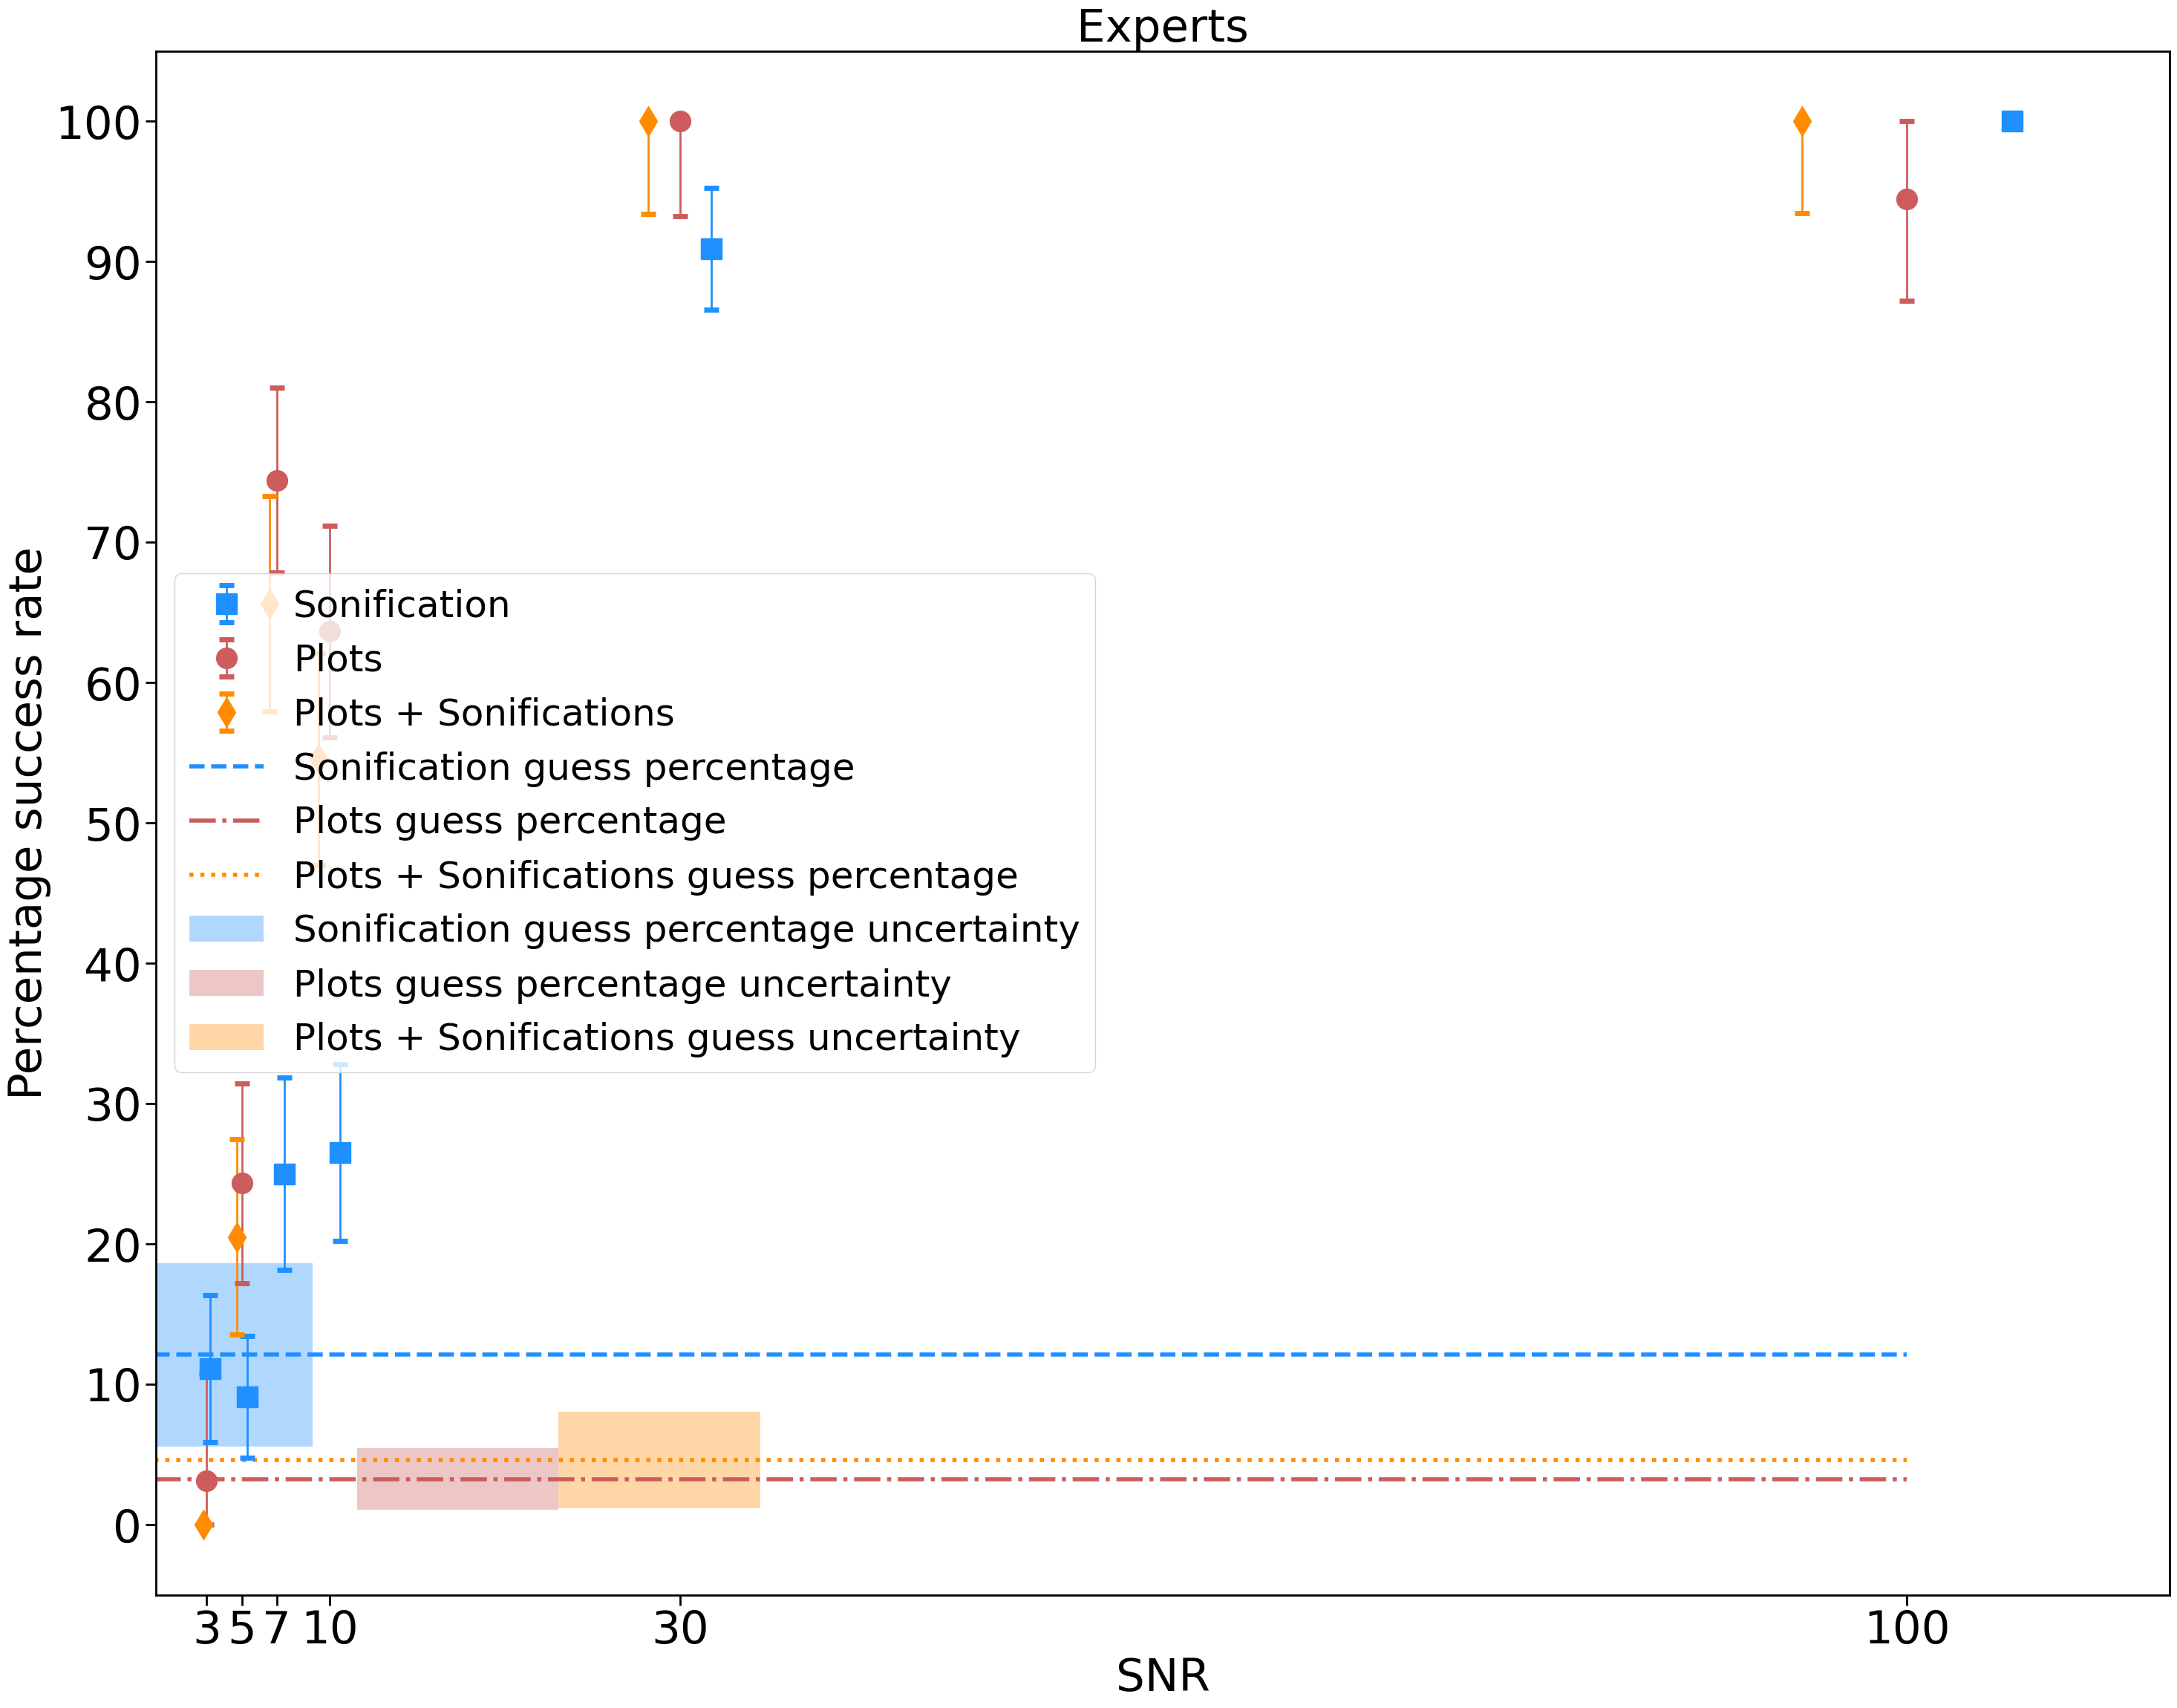

In [25]:
off = list(pexpert.index.values)
to_remove = []

for i in off:
    to_remove.append(i)
    
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)

print(len(responses)-len(to_remove),"responses")

total_responses_counter = 0

for x in names:
    search_function(x,expert_sound,expert_visual,expert_video)

print("Responses and correct answers calculated")

def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

str_df = [get_df_name(expert_sound),get_df_name(expert_visual),get_df_name(expert_video)]

sets_expert = pd.DataFrame({'Data':[expert_sound,expert_visual,expert_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets_expert['Data']:
    sort(x)
    #display(x)
    
print(calc_0guess(expert_sound,expert_visual,expert_video),"Guess percentages + errors for non-transit sonifications, plots and videos - experts")
print(calc_12guess(expert_sound,expert_visual,expert_video),"Guess percentages + errors for transit sonifications, plots and videos - experts")

def produce_n0(sets,sound_in,visual_in,video_in):
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[0:6]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

        prop = tot_n / tot_resp

        suc.append(tot_n/tot_resp*100)
        errsuc.append((np.sqrt(prop*(1-prop))/tot_resp)*100)

    f, ax = plt.subplots(figsize=(16,9))
    ax.bar([1,2,3], suc, yerr=error_out(suc,errsuc), 
           error_kw=dict(capthick=2.5, elinewidth=2.5, ecolor='black'), alpha=0.5,align='center', ecolor='black', capsize=60) 

    plt.ylim([0, 105])
    plt.xlim([0.5,3.5])
    ax.set_ylabel("Percentage success rate")
    ax.set_xlabel("Light curve format")
    x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
    x_locator = ticker.FixedLocator([1,2,3])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    ax.grid(axis="x", color="grey", alpha=.5, linewidth=.5)
    ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    
    return ax, suc, errsuc

def produce_12(sets,sound_in,visual_in,video_in):
    
    plt.rcParams.update({'font.size': 44})
    
    suc_12_sound = []
    suc_12_sounderr = []

    suc_12_visual = []
    suc_12_visualerr = []

    suc_12_video = []
    suc_12_videoerr = []
    
    snr = []

    for i in sets['Data']:

        j = i.iloc[6:18]
        
        def sort(df):
            df.sort_values(by=['SNR'], inplace=True)
            
        sort(j)

        for k in range(0,len(j['Name']),2):

            if len(snr) < 6:  
                snr.append(int(j.iloc[k]['SNR']))

            if "sonification" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
                
                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                    
                suc_12_sound.append(correct/tot*100.0)
                suc_12_sounderr.append(err*100.0)

            elif "plot" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                #err = np.sqrt(prop*(1-prop)/correct)#err = np.sqrt(correct)/tot
                suc_12_visual.append(correct/tot*100.0)
                suc_12_visualerr.append(err*100.0)

            else:

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_video.append(correct/tot*100.0)
                suc_12_videoerr.append(err*100.0)

    f, ax = plt.subplots(figsize=(35, 27))
    
    plt.errorbar([i + 0.06*i for i in snr], suc_12_sound, yerr=error_out(suc_12_sound,suc_12_sounderr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color = 'dodgerblue', linestyle="None", 
                 marker='s', markersize=20, capsize=7.5, label='Sonification')

    plt.errorbar(snr, suc_12_visual, yerr=error_out(suc_12_visual,suc_12_visualerr), 
                 capthick=5, elinewidth=2,
                 xerr=None, color='indianred', linestyle="None", 
                 marker='o', markersize=20, capsize=7.5, label='Plots')

    plt.errorbar([i - 0.06*i for i in snr], suc_12_video, yerr=error_out(suc_12_video,suc_12_videoerr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color='darkorange', linestyle="None", 
                 marker='d', markersize=20, capsize=7.5, label='Plots + Sonifications')

    guessperc_errs =  [error_out(calc_12guess(sound_in,visual_in,video_in)[0][0],calc_12guess(sound_in,visual_in,video_in)[1][0]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][1],calc_12guess(sound_in,visual_in,video_in)[1][1]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][2],calc_12guess(sound_in,visual_in,video_in)[1][2])]
                                                                                                                                                    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][0], 0, 100, linestyle = 'dashed', linewidth = 4, color= 'dodgerblue',
              label = 'Sonification guess percentage')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][0]-guessperc_errs[0][0][0], 10, 18, linestyle = 'dashed',color= 'dodgerblue')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][0]+guessperc_errs[0][1][0], 10, 18, linestyle = 'dashed',color= 'dodgerblue')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][0]-guessperc_errs[0][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][0]+guessperc_errs[0][1][0]),
               0.02765217391304348-0.05, 0.02765217391304348+0.05,
               facecolor='dodgerblue', alpha=0.35,label='Sonification guess percentage uncertainty')
    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][1], 0, 100, linestyle = 'dashdot', linewidth = 4, color= 'indianred',
              label = 'Plots guess percentage')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][1]-guessperc_errs[1][0][0], 22, 38, linestyle = 'dashed',color= 'indianred')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][1]+guessperc_errs[1][1][0], 22, 38, linestyle = 'dashed',color= 'indianred')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][1]-guessperc_errs[1][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][1]+guessperc_errs[1][1][0]),
               0.1,0.2,
              facecolor='indianred', alpha=0.35, label = 'Plots guess percentage uncertainty')

    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][2], 0, 100, linestyle = 'dotted', linewidth = 4, color= 'darkorange',
              label = 'Plots + Sonifications guess percentage')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][2]-guessperc_errs[2][0][0], 40, 65, linestyle = 'dashed',color= 'darkorange')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][2]+guessperc_errs[2][1][0], 40, 65, linestyle = 'dashed',color= 'darkorange')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][2]-guessperc_errs[2][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][2]+guessperc_errs[2][1][0]), 
               0.2,0.3,
               facecolor='darkorange', alpha=0.35, label = 'Plots + Sonifications guess uncertainty')

    #plt.xscale("log")
    plt.xlim(0.1,115)
    
    #plt.rcParams.update({'font.size': 27})
    
    ax.set_xlabel("SNR")
    ax.set_ylabel("Percentage success rate")
    #ax.set_title("Success rates for scientific experts as a function of SNR, light curves of 1 and 2 transits")
    x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
    x_locator = ticker.FixedLocator([3,5,7,10,30,100])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    
    plt.rcParams.update({'font.size': 36})
    
    plt.legend()#,fontsize='xx-large')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [6,7,8,3,4,5,0,1,2]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="center left")
    
    for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
    
    #ax.grid(axis="x", color="grey", alpha=.4, linewidth=2)
    #ax.grid(axis="y", color="grey", alpha=.4, linewidth=2)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)

    #ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=7, color='k')
    

    return ax

fig = produce_12(sets_expert,expert_sound,expert_visual,expert_video)
fig.set_title("Experts",fontsize=44)

plt.savefig("New report/Produced figures/n = 1,2, experts.jpg")

In [21]:
snr = [3,5,7,10,30,100]
empty = []

print((np.log(3)+0.06*np.log(30))/115)
    
for i in snr:
    j = i - 0.06*i
    k = i + 0.06*i
    
    ratio = (115-0.1)
    
    arr = [np.log(j/ratio),np.log(i/ratio),np.log(k/ratio)]
    empty.append(arr)
    
    coords = []
    
print(empty)

0.011327688100589905
[[-3.7073252999046877, -3.6454498961866, -3.5871809880626246], [-3.1964996761386972, -3.1346242724206097, -3.0763553642966337], [-2.8600274395174843, -2.7981520357993968, -2.7398831276754207], [-2.503352495578752, -2.4414770918606643, -2.3832081837366887], [-1.4047402069106423, -1.3428648031925547, -1.284595895068579], [-0.20076740258470618, -0.13889199886661865, -0.08062309074264296]]


In [ ]:
def log_transform():
    
    

# Non-experts

38 responses
Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated
([21.993284493284495, 25.11655011655012, 30.371017871017873], [8.50282305349951, 8.508332243124952, 9.287058337580914]) Guess percentages + errors for non-transit sonifications, plots and videos - non-experts
([20.634920634920636, 17.222222222222225, 16.190476190476186], [13.192271213192477, 11.932179542037998, 13.217297484950622]) Guess percentages + errors for transit sonifications, plots and videos - non-experts


<ipython-input-30-6cee798cefe2>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)
<ipython-input-30-6cee798cefe2>:173: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-30-6cee798cefe2>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


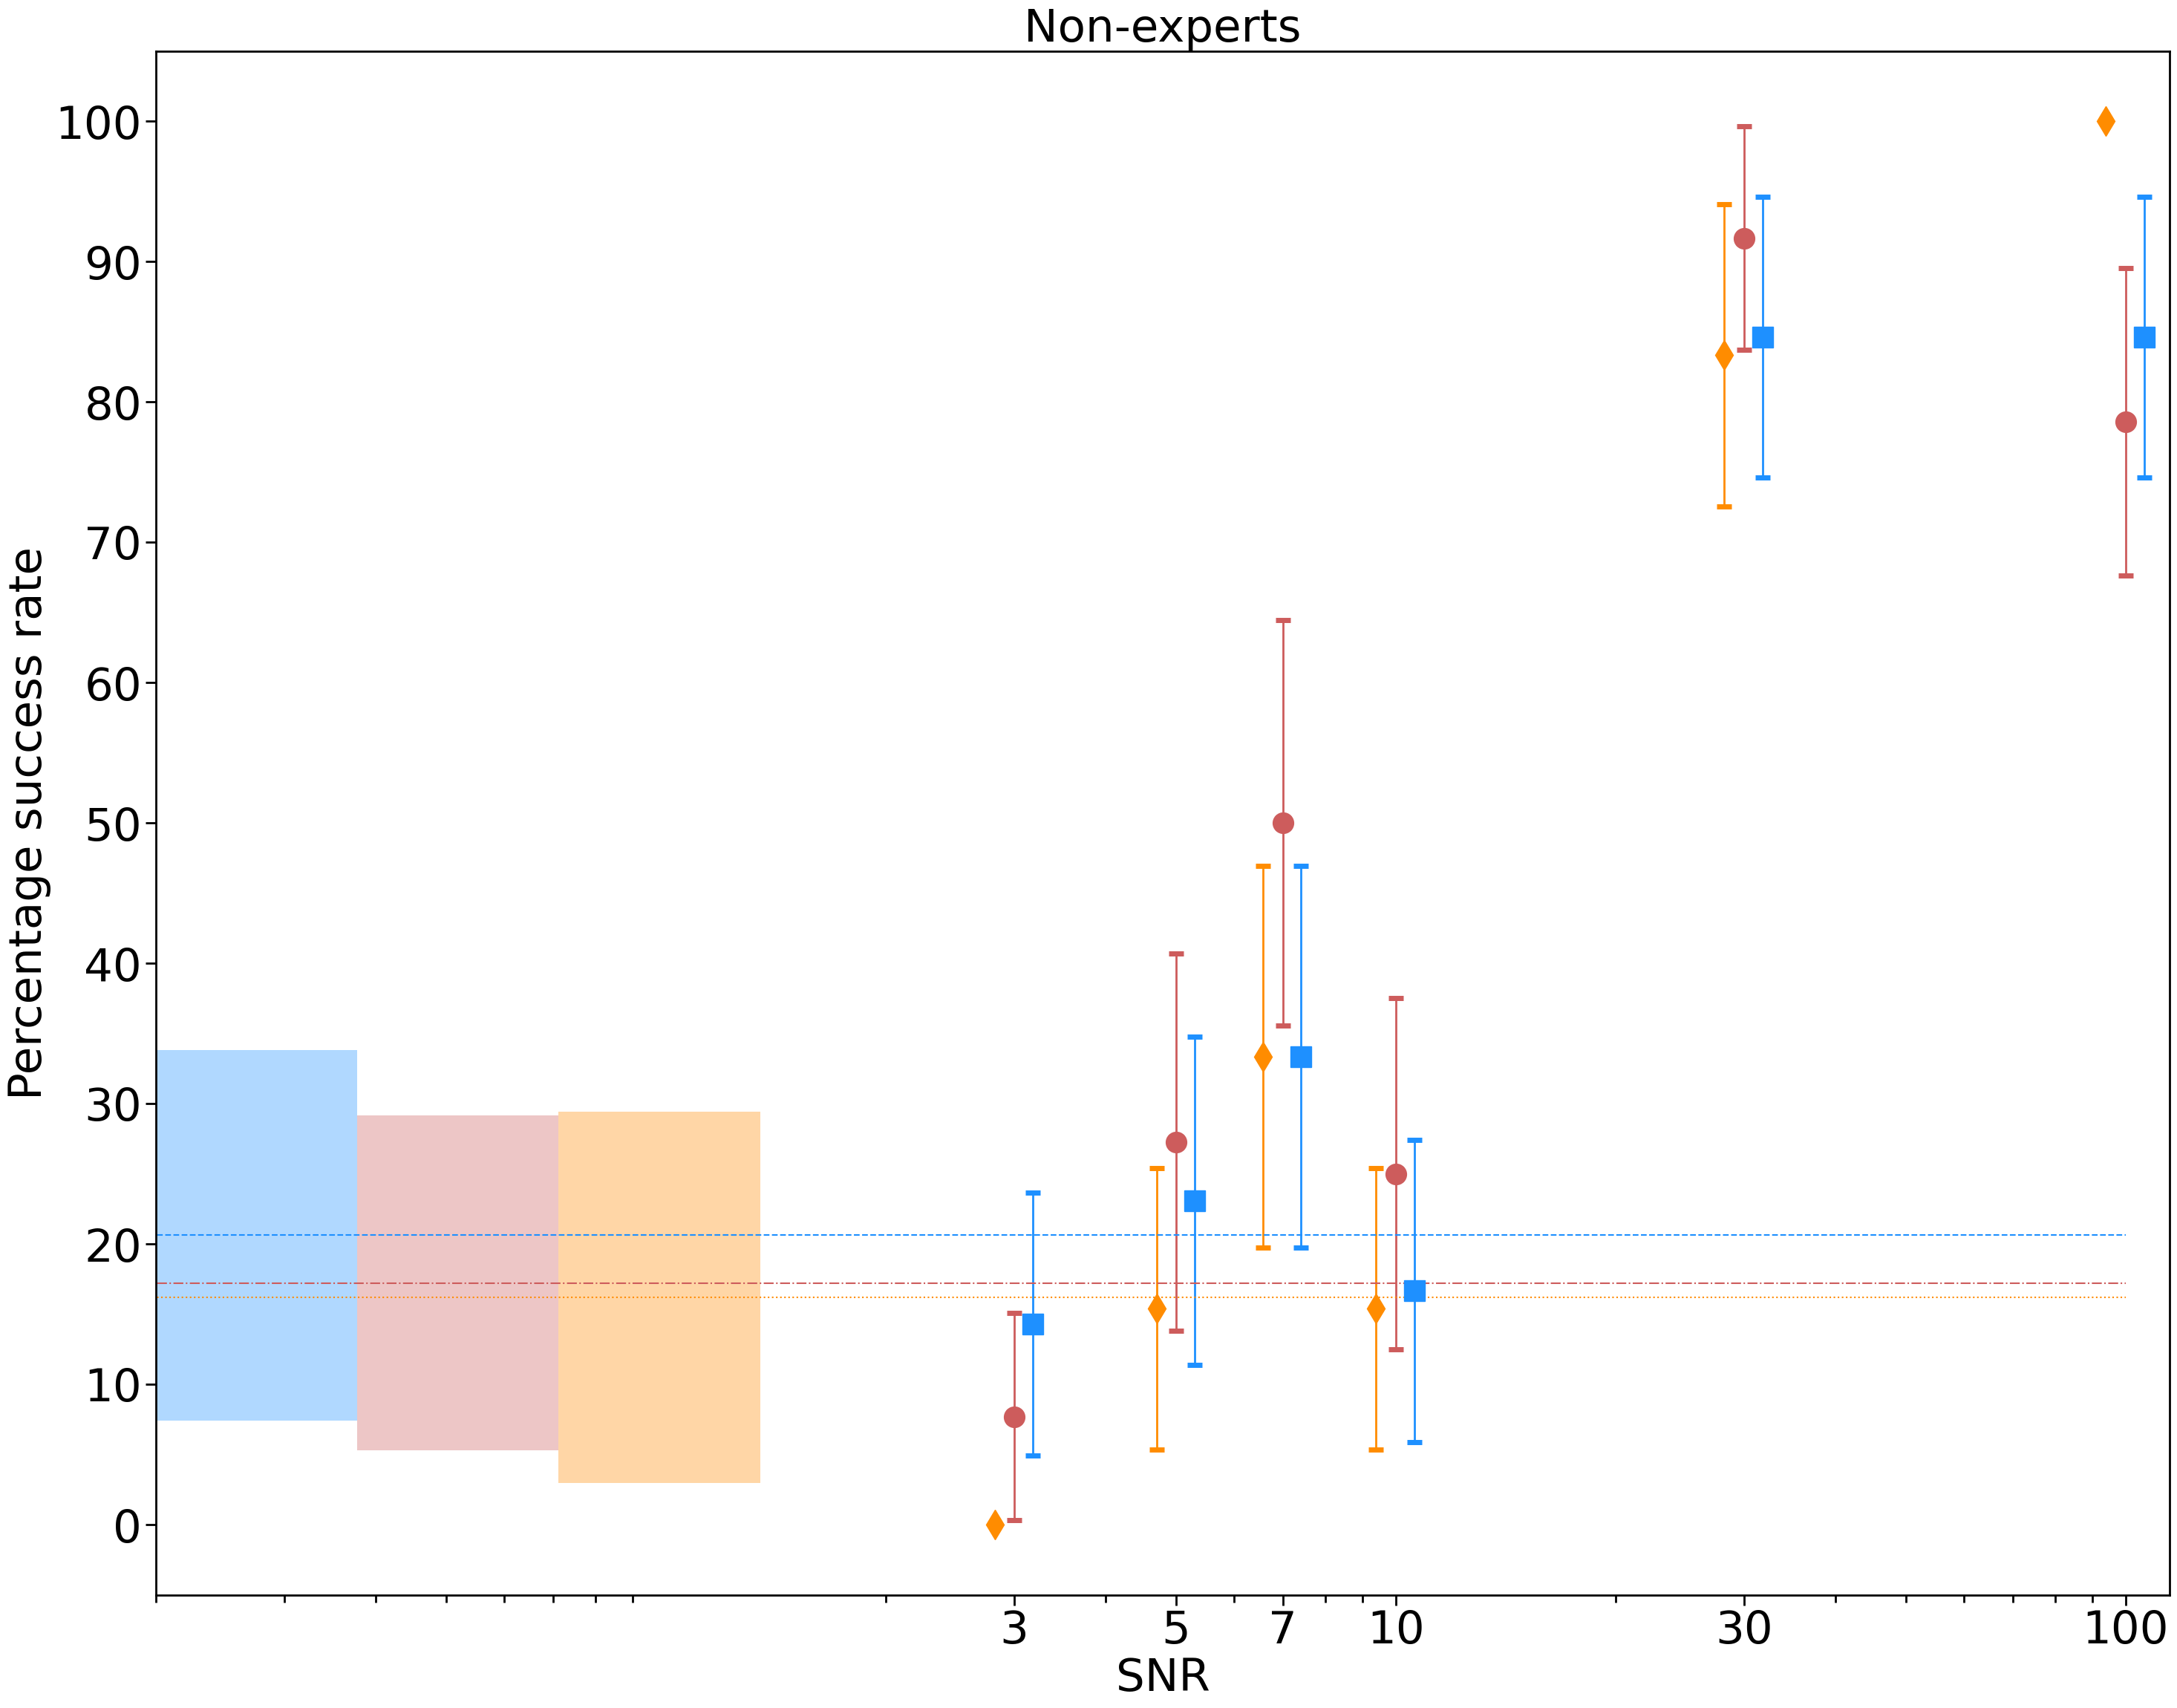

In [30]:
off = list(expert.index.values)+partials
to_remove = []

for i in off:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
        
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
        
print(len(responses)-len(to_remove),"responses")

total_responses_counter = 0
                
for x in names:
    search_function(x,nexpert_sound,nexpert_visual,nexpert_video)
    #time.sleep(3)

print("Responses and correct answers calculated")

str_df = [get_df_name(nexpert_sound),get_df_name(nexpert_visual),get_df_name(nexpert_video)]

sets_nexpert = pd.DataFrame({'Data':[nexpert_sound,nexpert_visual,nexpert_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)

for x in sets_nexpert['Data']:
    sort(x)
    #display(x)
    
print(calc_0guess(nexpert_sound,nexpert_visual,nexpert_video),"Guess percentages + errors for non-transit sonifications, plots and videos - non-experts")
print(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video),"Guess percentages + errors for transit sonifications, plots and videos - non-experts")

def produce_12(sets,sound_in,visual_in,video_in):
    
    plt.rcParams.update({'font.size': 44})
    
    suc_12_sound = []
    suc_12_sounderr = []

    suc_12_visual = []
    suc_12_visualerr = []

    suc_12_video = []
    suc_12_videoerr = []
    
    snr = []

    for i in sets['Data']:

        j = i.iloc[6:18]
        
        def sort(df):
            df.sort_values(by=['SNR'], inplace=True)
            
        sort(j)

        for k in range(0,len(j['Name']),2):

            if len(snr) < 6:  
                snr.append(int(j.iloc[k]['SNR']))

            if "sonification" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_sound.append(correct/tot*100.0)
                suc_12_sounderr.append(err*100.0)

            elif "plot" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_visual.append(correct/tot*100.0)
                suc_12_visualerr.append(err*100.0)

            else:

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_video.append(correct/tot*100.0)
                suc_12_videoerr.append(err*100.0)

    f, ax = plt.subplots(figsize=(35, 27))
    
    plt.errorbar([i + 0.06*i for i in snr], suc_12_sound, yerr=error_out(suc_12_sound,suc_12_sounderr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color = 'dodgerblue', linestyle="None", 
                 marker='s', markersize=20, capsize=7.5)#, label='Sonification')

    plt.errorbar(snr, suc_12_visual, yerr=error_out(suc_12_visual,suc_12_visualerr), 
                 capthick=5, elinewidth=2,
                 xerr=None, color='indianred', linestyle="None", marker='o', 
                 markersize=20, capsize=7.5)#, label='Plots')

    plt.errorbar([i - 0.06*i for i in snr], suc_12_video, yerr=error_out(suc_12_video,suc_12_videoerr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color='darkorange', linestyle="None", 
                 marker='d', markersize=20, capsize=7.5)#, label='Plots + Sonifications')

    guessperc_errs =  [error_out(calc_12guess(sound_in,visual_in,video_in)[0][0],calc_12guess(sound_in,visual_in,video_in)[1][0]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][1],calc_12guess(sound_in,visual_in,video_in)[1][1]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][2],calc_12guess(sound_in,visual_in,video_in)[1][2])]
                                                                                                                                                    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][0], 0, 100, linestyle = 'dashed',color= 'dodgerblue')#, 
            #  label = 'Sonification guess percentage ('+str(round(calc_12guess(sound_in,visual_in,video_in)[0][0]))+'±'+str(round(guessperc_errs[0][0][0]))+'%)')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][0]-guessperc_errs[0][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][0]+guessperc_errs[0][1][0]),
               0,0.1,
               facecolor='dodgerblue', alpha=0.35)#,label='Sonification guess percentage uncertainty')
    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][1], 0, 100, linestyle = 'dashdot',color= 'indianred')#, 
             # label = 'Plots guess percentage ('+str(round(calc_12guess(sound_in,visual_in,video_in)[0][1]))+'±'+str(round(guessperc_errs[1][0][0]))+'%)')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][1]-guessperc_errs[1][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][1]+guessperc_errs[1][1][0]), 
               0.1,0.2,
              facecolor='indianred', alpha=0.35)#, label = 'Plots guess percentage uncertainty')

    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][2], 0, 100, linestyle = 'dotted',color= 'darkorange')#, 
              #label = 'Plots + sonifications guess percentage ('+str(round(calc_12guess(sound_in,visual_in,video_in)[0][2]))+'±'+str(round(guessperc_errs[2][0][0]))+'%)')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][2]-guessperc_errs[2][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][2]+guessperc_errs[2][1][0]),
               0.2,0.3,
               facecolor='darkorange', alpha=0.35)#, label = 'Plots + Sonifications guess uncertainty')

    plt.xscale("log")
    plt.xlim(0.2,115)
    
    #plt.rcParams.update({'font.size': 27})
    
    ax.set_xlabel("SNR")
    ax.set_ylabel("Percentage success rate")
    #ax.set_title("Success rates for scientific experts as a function of SNR, light curves of 1 and 2 transits")
    x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
    x_locator = ticker.FixedLocator([3,5,7,10,30,100])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])

    for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
    
    #ax.grid(axis="x", color="grey", alpha=.25, linewidth=2)
    #ax.grid(axis="y", color="grey", alpha=.25, linewidth=2)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=7, color='k')
    
    return ax

fig = produce_12(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)
fig.set_title("Non-experts",fontsize=44)

plt.savefig("New report/Produced figures/n = 1,2, non-experts.jpg")

# Partial & non- experts

In [54]:
off = expert_indices
to_remove = []

for i in off:
    to_remove.append(i)
    
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
        
print(len(responses)-len(to_remove),"responses")

total_responses_counter = 0
                
for x in names:
    search_function(x,pexpert_sound,pexpert_visual,pexpert_video)

print("Responses and correct answers calculated")

str_df = [get_df_name(pexpert_sound),get_df_name(pexpert_visual),get_df_name(pexpert_video)]

sets_pexpert = pd.DataFrame({'Data':[pexpert_sound,pexpert_visual,pexpert_video],
                    'String': str_df})
    
def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets_pexpert['Data']:
    sort(x)
    #display(x)
    
print(calc_0guess(pexpert_sound,pexpert_visual,pexpert_video),"Guess percentages + errors for non-transit sonifications, plots and videos - partial and non-experts")
print(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video),"Guess percentages + errors for transit sonifications, plots and videos - partial and non-experts")

74 responses
Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated
([29.669540229885058, 24.47066822066822, 27.02294685990338], [5.76801245106877, 6.240769078230713, 6.339506848185088]) Guess percentages + errors for non-transit sonifications, plots and videos - partial and non-experts
([15.569153069153069, 11.397306397306396, 14.306526806526804], [8.947739025950225, 7.54400074453595, 8.793040732779787]) Guess percentages + errors for transit sonifications, plots and videos - partial and non-experts


# Combining the sub-groups

## No-transit data

<ipython-input-60-f2374c99698a>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


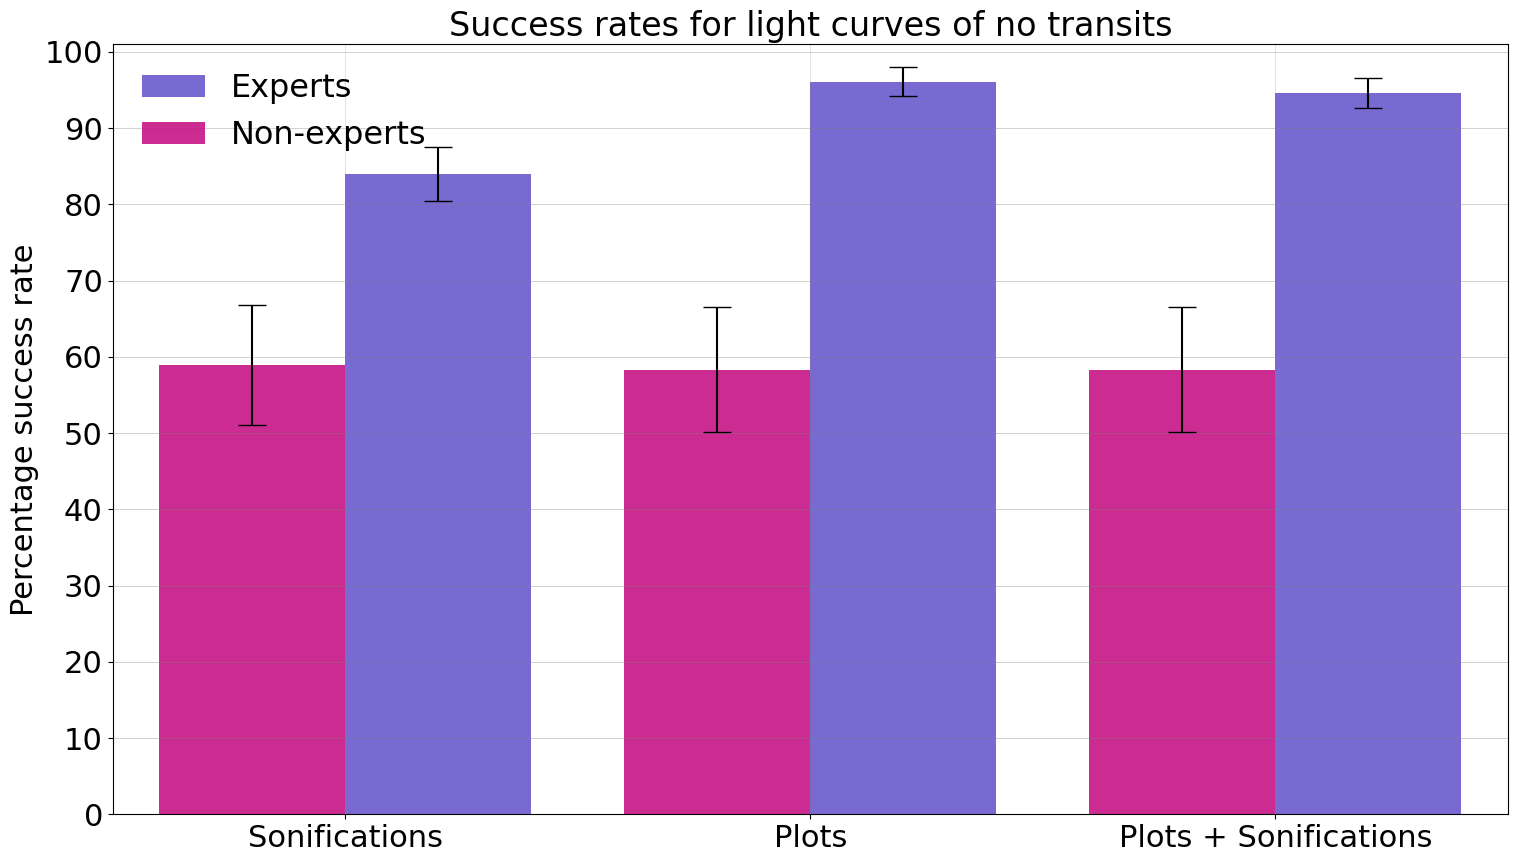

In [60]:
def successrates_n0(sets,sound_in,visual_in,video_in):
    
    plt.rcParams.update({'font.size': 22})
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[0:6]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

            prop = tot_n/tot_resp

        suc.append(tot_n/tot_resp*100)
        errsuc.append((np.sqrt(prop*(1-prop)/tot_resp)*100))

    return suc, errsuc

suc_expert = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[0]
errsuc_expert = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[1]
suc_nexpert = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[0]
errsuc_nexpert = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[1]

f, ax = plt.subplots(111,figsize=(18,10))
ax = plt.subplot(111)

x_loc = [0,0.5,1]

ax.bar([x + 0.1 for x in x_loc], suc_expert, yerr = error_out(suc_expert,errsuc_expert), width=0.2, 
       color='slateblue', align='center',alpha=0.9,capsize=10,label='Experts')

expertguess = calc_0guess(expert_sound,expert_visual,expert_video)

ax.bar([x - 0.1 for x in x_loc], suc_nexpert, yerr = error_out(suc_nexpert,errsuc_nexpert), width=0.2, 
       color='mediumvioletred', align='center',alpha=0.9,capsize=10,label='Non-experts')

nexpertguess = calc_0guess(nexpert_sound,nexpert_visual,nexpert_video)

ax.set_xlabel("",fontsize=20)
ax.set_xlim(-0.25,1.25)

plt.xticks([0,0.5,1])

plt.rcParams.update({'font.size': 20})

ax.set_ylabel("Percentage success rate",fontsize=22)
ax.set_ylim(0,101)

ax.set_title("Success rates for light curves of no transits")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Plots + Sonifications"])
plt.rcParams.update({'font.size': 25})
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)

plt.rcParams.update({'font.size': 23})
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

ax.legend(loc='best',framealpha=0)

plt.savefig("New report/Produced figures/n = 0 transits two subgroups, barnew.jpg")

## Extracting medium-SNR regime results

<ipython-input-75-8121c225daf6>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Correct n'], inplace=True)
<ipython-input-76-75f096585379>:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


[<matplotlib.collections.LineCollection object at 0x000001B579CC1670>, <BarContainer object of 3 artists>, <BarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>] ['Guess percentage', 'Experts', 'Non-experts', 'Guess percentage uncertainty']


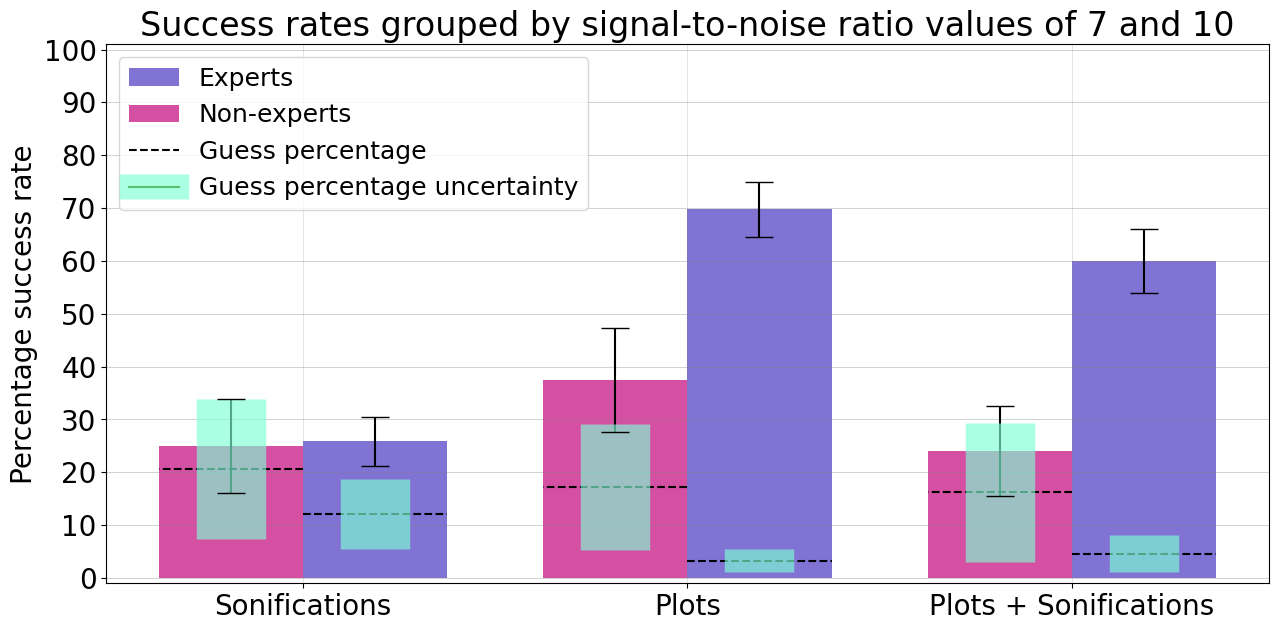

In [76]:
def extract_regime(sets,regime_arr):
    
    suc = []
    errsuc = []
    snr = [3,5,7,10,30,100]
    
    for i in sets['Data']:
        
        j = i.iloc[6:18]
        sort(j)
        
        for i in snr:
            if i not in regime_arr:
                j = j[j['SNR'] != str(i)]

        j['Total responses'] = j['Total responses'].astype(int)
        tot = j['Total responses'].sum()
        j['Number of correct answers'] = j['Number of correct answers'].astype(int)
        correct = j['Number of correct answers'].sum()
        
        prop = correct/tot
                
        if correct == 0:
            err = 0

        else:
            err = np.sqrt(prop*(1-prop)/tot)
        
        suc.append(correct/tot*100.0)
        errsuc.append(err*100.0)
    
    return suc, errsuc

def produce_regime_figure2(regime_arr):
    
    plt.rcParams.update({'font.size': 20})
    
    suc = [extract_regime(sets_expert,regime_arr)[0],extract_regime(sets_nexpert,regime_arr)[0],extract_regime(sets_pexpert,regime_arr)[0]]
    err = [extract_regime(sets_expert,regime_arr)[1],extract_regime(sets_nexpert,regime_arr)[1],extract_regime(sets_pexpert,regime_arr)[1]]
    
    f, ax = plt.subplots(111,figsize=(15,7))
    ax = plt.subplot(111)
    x_loc = [0.1,0.5,0.9]
    
    ax.bar([x + 0.075 for x in x_loc], suc[0], 
       yerr = error_out(suc[0],err[0]), width=0.15, 
       color='slateblue', align='center',alpha=0.85,capsize=10,label='Experts')
    
    ax.bar([x - 0.075 for x in x_loc], suc[1], 
       yerr = error_out(suc[1],err[1]),width=0.15, 
       color='mediumvioletred', align='center',alpha=0.75,capsize=10,label='Non-experts')
    
    expertguess = calc_12guess(expert_sound,expert_visual,expert_video)
    nexpertguess = calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)
    
    ax.hlines(expertguess[0][0], x_loc[0], x_loc[0]+0.15, linestyle = 'dashed',color= 'black',label='Guess percentage')
    ax.hlines(expertguess[0][1], x_loc[1], x_loc[1]+0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(expertguess[0][2], x_loc[2], x_loc[2]+0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(nexpertguess[0][0], x_loc[0], x_loc[0]-0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(nexpertguess[0][1], x_loc[1], x_loc[1]-0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(nexpertguess[0][2], x_loc[2], x_loc[2]-0.15, linestyle = 'dashed',color= 'black')
    
    plt.errorbar(x_loc[0]+0.075,expertguess[0][0],yerr=[[expertguess[1][0]],[expertguess[1][0]]],ecolor='aquamarine',elinewidth=50,alpha=0.65,label='Guess percentage uncertainty')
    plt.errorbar(x_loc[1]+0.075,expertguess[0][1],yerr=[[expertguess[1][1]],[expertguess[1][1]]],ecolor='aquamarine',elinewidth=50,alpha=0.65)
    plt.errorbar(x_loc[2]+0.075,expertguess[0][2],yerr=[[expertguess[1][2]],[expertguess[1][2]]],ecolor='aquamarine',elinewidth=50,alpha=0.65)
    plt.errorbar(x_loc[0]-0.075,nexpertguess[0][0],yerr=[[nexpertguess[1][0]],[nexpertguess[1][0]]],ecolor='aquamarine',elinewidth=50,alpha=0.65)
    plt.errorbar(x_loc[1]-0.075,nexpertguess[0][1],yerr=[[nexpertguess[1][1]],[nexpertguess[1][1]]],ecolor='aquamarine',elinewidth=50,alpha=0.65)
    plt.errorbar(x_loc[2]-0.075,nexpertguess[0][2],yerr=[[nexpertguess[1][2]],[nexpertguess[1][2]]],ecolor='aquamarine',elinewidth=50,alpha=0.65)
    
    #print(expertguess)
    
    ax.set_xlabel("",fontsize=20)
    ax.set_ylabel("Percentage of users",fontsize=20)
    

    #print(calc_12guess(expert_sound,expert_visual,expert_video))
    #print(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video))
    #print(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video))
    
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[1],1.5, 2.5, linestyle = 'dashed',color= 'black')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[2],2.5, 4, linestyle = 'dashed',color= 'black')
    
    plt.xticks(x_loc,fontsize=20)
    plt.ylim(-1,101)
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
    ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
    ax.set_ylabel("Percentage success rate")
    ax.set_title("Success rates grouped by signal-to-noise ratio values of "+str(regime_arr[0])+" and "+str(regime_arr[1]))
    x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Plots + Sonifications"])
    x_locator = ticker.FixedLocator(x_loc)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    
    plt.rcParams.update({'font.size': 18})
    #if regime_arr == [7,10]:
    plt.legend()#,fontsize='xx-large')

    handles, labels = plt.gca().get_legend_handles_labels()
    print(handles, labels)
    order = [1,2,0,3]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="best")

    plt.savefig("New report/Produced figures/2Success rates by regime - "+str(regime_arr)+"new.jpg")
    
    return ax
    
b = produce_regime_figure2([7,10]) # Medium-SNR

# Tabulating final results

In [58]:
def produce_12_raw(sets):#,sound_in,visual_in,video_in):
    
    suc_12_sound = []
    suc_12_sounderr = []

    suc_12_visual = []
    suc_12_visualerr = []

    suc_12_video = []
    suc_12_videoerr = []

    snr = []

    for i in sets['Data']:

        j = i.iloc[6:18]
        
        def sort(df):
            df.sort_values(by=['SNR'], inplace=True)
            
        sort(j)

        for k in range(0,len(j['Name']),2):

            if len(snr) < 6:  
                snr.append(float(j.iloc[k]['SNR']))

            if "sonification" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_sound.append(correct/tot*100.0)
                suc_12_sounderr.append(err*100.0)

            elif "plot" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_visual.append(correct/tot*100.0)
                suc_12_visualerr.append(err*100.0)

            else:

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                prop = correct/tot
                
                if correct == 0:
                    err = 0
                    
                else:
                    err = np.sqrt(prop*(1-prop)/tot)
                suc_12_video.append(correct/tot*100.0)
                suc_12_videoerr.append(err*100.0)
                
    return snr, suc_12_sound, suc_12_sounderr, suc_12_visual, suc_12_visualerr, suc_12_video, suc_12_videoerr

def produce_0_raw(sets):
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[0:6]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

        prop = tot_n/tot_resp

        suc.append(tot_n/tot_resp*100)
        errsuc.append(np.sqrt(prop*(1-prop)/tot_resp)*100)
        
        return suc, errsuc
    
full_responses = []
full_correct = []

def tabulate_indiv(df):

    raw_responses = []

    raw_correct = []

    df = df.drop(['Name', '# of 0s','# of 1s','# of 2s','# of 3s','# of 4s','KS test result','Survey','σ'], axis=1)
    df['Correct n'] = pd.to_numeric(df['Correct n'], downcast="float")
    df['Number of correct answers'] = pd.to_numeric(df['Number of correct answers'], downcast="float")
    df['Total responses'] = pd.to_numeric(df['Total responses'], downcast="float")
    df['SNR'] = pd.to_numeric(df['SNR'], downcast="float")
    
    df = df.sort_values(by=['Correct n','SNR'],ascending=True)
    df = df.reset_index(drop=True)
    #display(df)
    
    for i in range(6,12):
        correct_12 = df.iloc[i]['Number of correct answers'] + df.iloc[6+i]['Number of correct answers']
        raw_correct.append(correct_12)
        
        total_12 = df.iloc[i]['Total responses'] + df.iloc[6+i]['Total responses']
        raw_responses.append(total_12)
    
    correct0 = df.iloc[0:6].sum()
    
    raw_correct.append(correct0[1])
    raw_responses.append(correct0[2])
    
    return raw_correct, raw_responses
    
for j in sets_expert['Data']:

    full_correct.append(tabulate_indiv(j)[0])
    full_responses.append(tabulate_indiv(j)[1])
    
for j in sets_pexpert['Data']:

    full_correct.append(tabulate_indiv(j)[0])
    full_responses.append(tabulate_indiv(j)[1])
        
for j in sets_nexpert['Data']:

    full_correct.append(tabulate_indiv(j)[0])
    full_responses.append(tabulate_indiv(j)[1])
    
def tabulate(sets_expert,sets_pexpert,sets_nexpert):
    
    expert = produce_12_raw(sets_expert)
    pexpert = produce_12_raw(sets_pexpert)
    nexpert = produce_12_raw(sets_nexpert)
    expert_0 = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[0]
    err_expert_0 = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[1]
    pexpert_0 = successrates_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[0]
    err_pexpert_0 = successrates_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[1]
    nexpert_0 = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[0]
    err_nexpert_0 = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[1]
    
    snr = produce_12_raw(sets_expert)[0]

    full_arr = []
    
    def form(i):
        
        new = str(int(np.round(i,0)))
        return new
    
    for i in range(0,len(snr)):
        
        data = [[[''],[''],[form(expert[1][i]) + ' ± ' + form(expert[2][i])],
                [''],[''],[form(expert[3][i]) + ' ± ' + form(expert[4][i])],
                [''],[''],[form(expert[5][i]) + ' ± ' + form(expert[6][i])]],
               [[''],[''],[form(pexpert[1][i]) + ' ± ' + form(pexpert[2][i])],
                [''],[''],[form(pexpert[3][i]) + ' ± ' + form(pexpert[4][i])],
                [''],[''],[form(pexpert[5][i]) + ' ± ' + form(pexpert[6][i])]],
               [[''],[''],[form(nexpert[1][i]) + ' ± ' + form(nexpert[2][i])],
                [''],[''],[form(nexpert[3][i]) + ' ± ' + form(nexpert[4][i])],
                [''],[''],[form(nexpert[5][i]) + ' ± ' + form(nexpert[6][i])]]]
        
        full_arr.append(data)
    
    groups = ['Experts', 'Partial and non-experts', 'Non-experts']
    groups_data = ['Sonifications','Plots','Plots + Sonifications']
    assoc = ['Total responses','Correct answers','Success rate %']
    Banks = snr
    Data = full_arr[0],full_arr[1],full_arr[2],full_arr[3],full_arr[4],full_arr[5]
    Data = np.array(Data).reshape(len(Banks),len(groups_data) * len(groups) * len(assoc))
    
    def sort(df):
        df.sort_values(by=['SNR'], inplace=True)

    midx = pd.MultiIndex.from_product([groups, groups_data, assoc])
    df = pd.DataFrame(Data, columns=midx).sort_index()#.astype(float)
    df.insert(0, "SNR", [10,100,3,30,5,7], True)
    sort(df)
    df = df.reset_index(drop=True)
    
    guesses_12 = ['Guess percentage','','',form(calc_12guess(expert_sound,expert_visual,expert_video)[0][0]) + ' ± ' + form(calc_12guess(expert_sound,expert_visual,expert_video)[1][0]),
                            '','',form(calc_12guess(expert_sound,expert_visual,expert_video)[0][1]) + ' ± ' + form(calc_12guess(expert_sound,expert_visual,expert_video)[1][1]),
                            '','',form(calc_12guess(expert_sound,expert_visual,expert_video)[0][2]) + ' ± ' + form(calc_12guess(expert_sound,expert_visual,expert_video)[1][2]),
                            '','',form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[0][0]) + ' ± ' + form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[1][0]),
                            '','',form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[0][1]) + ' ± ' + form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[1][1]),
                            '','',form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[0][2]) + ' ± ' + form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[1][2]),
                            '','',form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[0][0]) + ' ± ' + form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[1][0]),
                            '','',form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[0][1]) + ' ± ' + form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[1][1]),
                            '','',form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[0][2]) + ' ± ' + form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[1][2])]

    for i in range(0,6):
        df.loc[i,("Experts", "Sonifications","Total responses")] = full_responses[0][i]
        df.loc[i,("Experts", "Sonifications","Correct answers")] = full_correct[0][i]
        df.loc[i,("Experts", "Plots","Total responses")] = full_responses[1][i]
        df.loc[i,("Experts", "Plots","Correct answers")] = full_correct[1][i]
        df.loc[i,("Experts", "Plots + Sonifications","Total responses")] = full_responses[2][i]
        df.loc[i,("Experts", "Plots + Sonifications","Correct answers")] = full_correct[2][i]
        df.loc[i,("Partial and non-experts", "Sonifications","Total responses")] = full_responses[3][i]
        df.loc[i,("Partial and non-experts", "Sonifications","Correct answers")] = full_correct[3][i]
        df.loc[i,("Partial and non-experts", "Plots","Total responses")] = full_responses[4][i]
        df.loc[i,("Partial and non-experts", "Plots","Correct answers")] = full_correct[4][i]
        df.loc[i,("Partial and non-experts", "Plots + Sonifications","Total responses")] = full_responses[5][i]
        df.loc[i,("Partial and non-experts", "Plots + Sonifications","Correct answers")] = full_correct[5][i]
        df.loc[i,("Non-experts", "Sonifications","Total responses")] = full_responses[6][i]
        df.loc[i,("Non-experts", "Sonifications","Correct answers")] = full_correct[6][i]
        df.loc[i,("Non-experts", "Plots","Total responses")] = full_responses[7][i]
        df.loc[i,("Non-experts", "Plots","Correct answers")] = full_correct[7][i]
        df.loc[i,("Non-experts", "Plots + Sonifications","Total responses")] = full_responses[8][i]
        df.loc[i,("Non-experts", "Plots + Sonifications","Correct answers")] = full_correct[8][i]
    
    zero_data = ['Grouped zero transits',full_responses[0][6],full_correct[0][6],form(expert_0[0]) + ' ± ' + form(err_expert_0[0]),
                 full_responses[1][6],full_correct[1][6],form(expert_0[1]) + ' ± ' + form(err_expert_0[1]),
                 full_responses[2][6],full_correct[2][6],form(expert_0[2]) + ' ± ' + form(err_expert_0[2]),
                 full_responses[3][6],full_correct[3][6],form(pexpert_0[0]) + ' ± ' + form(err_pexpert_0[0]),
                 full_responses[4][6],full_correct[4][6],form(pexpert_0[1]) + ' ± ' + form(err_pexpert_0[1]),
                 full_responses[5][6],full_correct[5][6],form(pexpert_0[2]) + ' ± ' + form(err_pexpert_0[2]),
                 full_responses[6][6],full_correct[6][6],form(nexpert_0[0]) + ' ± ' + form(err_nexpert_0[0]),
                 full_responses[7][6],full_correct[7][6],form(nexpert_0[1]) + ' ± ' + form(err_nexpert_0[1]),
                 full_responses[8][6],full_correct[8][6],form(nexpert_0[2]) + ' ± ' + form(err_nexpert_0[2])]

    df.loc[len(df)] = guesses_12
    df.loc[len(df)] = zero_data
    
    target_row = 7

    idx = [target_row] + [i for i in range(len(df)) if i != target_row]
    df = df.iloc[idx]

    cor = [2,5,8,11,14,17,20,23,26]
    for i in range(0,len(df)):
    
        
        for j in cor:
    
            if df.iloc[i,j] == 0:

                df.iloc[i,j+1] = df.iloc[i,j+1].replace('0 ± 0',"0")
                
            else:
                
                continue
    
    dfi.export(df,'New report/Produced figures/full_table_12.jpg')

    #print(df.to_latex(index=False))

    return df

tabulate(sets_expert,sets_pexpert,sets_nexpert)

left = tabulate(sets_expert,sets_pexpert,sets_nexpert).iloc[0:,0:1]

tables = []

df_expert = tabulate(sets_expert,sets_pexpert,sets_nexpert).iloc[0:,1:10]
df_expert = pd.concat([left,df_expert],axis=1)
tables.append(df_expert)
display(df_expert)

df_pexpert = tabulate(sets_expert,sets_pexpert,sets_nexpert).iloc[0:,10:19]
df_pexpert = pd.concat([left,df_pexpert],axis=1)
tables.append(df_pexpert)
display(df_pexpert)

df_nexpert = tabulate(sets_expert,sets_pexpert,sets_nexpert).iloc[0:,19:28]
df_nexpert = pd.concat([left,df_nexpert],axis=1)
tables.append(df_nexpert)
display(df_nexpert)

arr = ["experts","partial_nonexperts","nonexperts"]

for i in range(0,len(tables)):
    f = open(arr[i]+".tex", "w")
    f.write(tables[i].to_latex(index=False))
    f.close()

#print(df_expert.to_latex(index=False))

<ipython-input-58-831d300b0cfd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR         Experts                                 \
                           Sonifications                                  
                         Total responses Correct answers Success rate %   
7  Grouped zero transits             106              89         84 ± 4   
0                      3              36               4         11 ± 5   
1                      5              44               4          9 ± 4   
2                      7              40              10         25 ± 7   
3                     10              49              13         27 ± 6   
4                     30              44              40         91 ± 4   
5                    100              33              33        100 ± 0   
6       Guess percentage                                         12 ± 7   

                                                                        \
            Plots                                Plots + Sonifications   
  Total responses Correct answers Success rate %       Total responses   
7             102              98         96 ± 2                   130   
0              32               1          3 ± 3                    43   
1              37               9         24 ± 7                    39   
2              43              32         74 ± 7                    32   
3              33              21         64 ± 8                    33   
4              41              41        100 ± 0                    43   
5              36              34         94 ± 4                    44   
6                                          3 ± 2                         

                                  
                                  
  Correct answers Success rate %  
7             123         95 ± 2  
0               0              0  
1               8         21 ± 6  
2              21         66 ± 8  
3              18         55 ± 9  
4              43        100 ± 0  
5              44        100 ± 0  
6                          5 ± 3

<ipython-input-58-831d300b0cfd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR Partial and non-experts                  \
                                   Sonifications                   
                                 Total responses Correct answers   
7  Grouped zero transits                      75              51   
0                      3                      29               2   
1                      5                      27               5   
2                      7                      24               7   
3                     10                      27               5   
4                     30                      27              24   
5                    100                      23              20   
6       Guess percentage                                           

                                                                 \
                           Plots                                  
  Success rate % Total responses Correct answers Success rate %   
7         68 ± 5              65              46         71 ± 6   
0          7 ± 5              26               1          4 ± 4   
1         19 ± 7              22               8        36 ± 10   
2         29 ± 9              22              14        64 ± 10   
3         19 ± 7              22              10        45 ± 11   
4         89 ± 6              24              22         92 ± 6   
5         87 ± 7              28              25         89 ± 6   
6         16 ± 9                                         11 ± 8   

                                                        
  Plots + Sonifications                                 
        Total responses Correct answers Success rate %  
7                    72              52         72 ± 5  
0                    23               0              0  
1                    22               5         23 ± 9  
2                    24              13        54 ± 10  
3                    23               7        30 ± 10  
4                    22              20         91 ± 6  
5                    22              22        100 ± 0  
6                                               14 ± 9

<ipython-input-58-831d300b0cfd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR     Non-experts                                 \
                           Sonifications                                  
                         Total responses Correct answers Success rate %   
7  Grouped zero transits              39              23         59 ± 8   
0                      3              14               2         14 ± 9   
1                      5              13               3        23 ± 12   
2                      7              12               4        33 ± 14   
3                     10              12               2        17 ± 11   
4                     30              13              11        85 ± 10   
5                    100              13              11        85 ± 10   
6       Guess percentage                                        21 ± 13   

                                                                        \
            Plots                                Plots + Sonifications   
  Total responses Correct answers Success rate %       Total responses   
7              36              21         58 ± 8                    36   
0              13               1          8 ± 7                    11   
1              11               3        27 ± 13                    13   
2              12               6        50 ± 14                    12   
3              12               3        25 ± 12                    13   
4              12              11         92 ± 8                    12   
5              14              11        79 ± 11                    12   
6                                        17 ± 12                         

                                  
                                  
  Correct answers Success rate %  
7              21         58 ± 8  
0               0              0  
1               2        15 ± 10  
2               4        33 ± 14  
3               2        15 ± 10  
4              10        83 ± 11  
5              12        100 ± 0  
6                        16 ± 13